#TREND - Long Term Duration
 It is defined as a long term increase or decrease in the data over time. It reflects the general direction of the data, ignoring short term fluctutions. Real life example

1.   Population of city steadily rising over decades
2.   Stock Market Index like Nifty or S&P 500 usually shows an upward trend over 10-20 years
3. Company revenue increasing due to business growth

Imagine Plotting your monthly income over 10 years. Even if there are some ups and downs each month, if it mostly keeps increasing thats a positive trend.




In [16]:
import pandas as pd # Reading the CSV or any excel file
import matplotlib.pyplot as plt #This is to plot the Graph


In [17]:
df=pd.read_csv("AirPassengers (1).csv") #now loading the Data

In [18]:
#df.head(1)
df.tail(5)

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


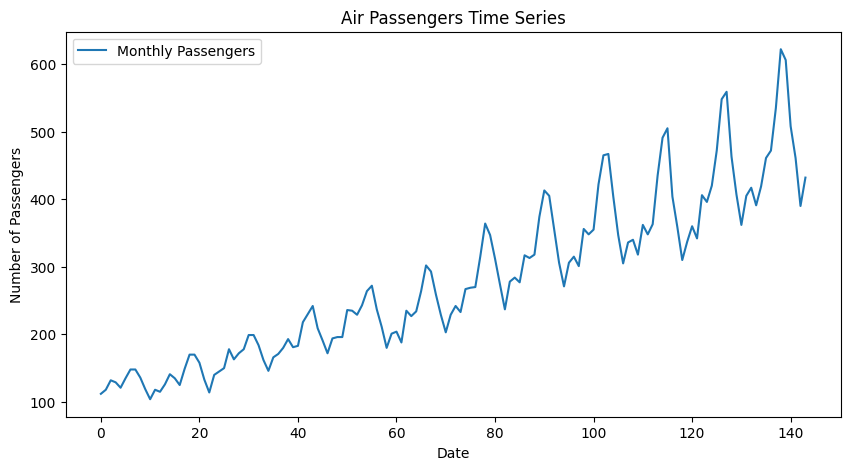

In [19]:
plt.figure(figsize=(10,5))
plt.plot(df['#Passengers'],label='Monthly Passengers')
plt.title("Air Passengers Time Series")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

"What’s the general direction here? Is the number of passengers increasing, decreasing, or constant over time?"

# 2. SEASONALITY – Regular Repeating Patterns
Seasonality refers to  patterns that repeat at fixed intervals - typically within a year (Monthly,quaterly,Weekly or even daily). These are driven by seasons, holidays or business cycle

Real life Example:
1. Ice cream sales peak every Summer
2. E-commerce traffic spikes during diwali/Black Friday
3. Electricity Usage rises in Summer due to AC USage.

### explantion
Think of how shops sell more during Christmas or how ur electircity bill spikes in the summer, that repeating pattern is seasonability

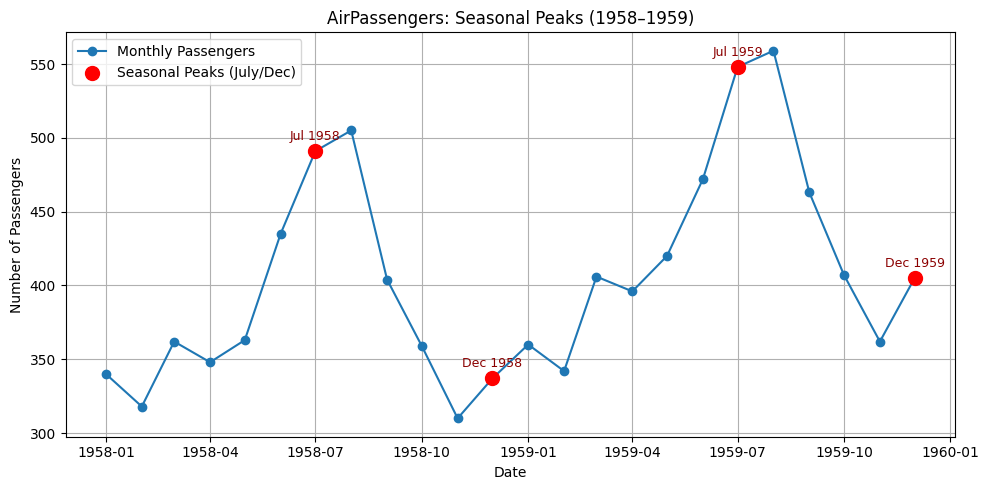

In [20]:
#Converting the month to Date format
df['Month'] = pd.to_datetime(df['Month'])
#setting the index as month but we are not changing the orginal Dataset so we kept inplace= False
df.set_index('Month', inplace=True)

# Filter for 2 years (e.g., 1958-1959)
df_zoom = df['1958':'1959']

# Extract months for highlighting
highlight_months = df_zoom[df_zoom.index.month.isin([7, 12])]  # July and December

# Plot the 2-year time series
plt.figure(figsize=(10, 5))
plt.plot(df_zoom.index, df_zoom['#Passengers'], marker='o', label='Monthly Passengers')

# Highlight July and December peaks
plt.scatter(highlight_months.index, highlight_months['#Passengers'],
            color='red', s=100, label='Seasonal Peaks (July/Dec)', zorder=5)

# Annotate the peaks
for idx in highlight_months.index:
    plt.annotate(f"{idx.strftime('%b %Y')}",
                 xy=(idx, highlight_months.loc[idx, '#Passengers']),
                 xytext=(0, 8), textcoords='offset points', ha='center', fontsize=9, color='darkred')

# Customize plot
plt.title('AirPassengers: Seasonal Peaks (1958–1959)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


# Cyclic Patterns - Irregular Long term Fluctuations

Cyclic Behavior occurs over longer  and variable time periods often tied to economic or business cycles (e.g. Booms and recession). Unlike seasonlity, cycle dont repeat at fixed intervals.

### Real life examples :  

1. Economic boom and recession cycles (2008).
2. Oil Price fluctuations due to geopolitical tensions
3. Housing market rise and fall over decades

### Explanation   
 While seasonality is like summer coming every year, cycles are more like rollercoaster ups and downs phases that takes years to repeat.


### How to differentiate Cycle from Seasonality:
1. Seasonality is regular and short term(eg.Monthly, yearly)
2. Cycles are irregular and long term.

# Noise - Random Fluctuations

Definition:
Noise is the random, Unpredictable Variation in the time series. It doesnt follow any patterns and is due to Unexplained or unknown factors.


### Real life examples
1. Sudden Surge in Sales due to viral social media post
2. A Spike in temperature due to rare weather event.
3. Sensor Malfuntions causing outlier data.

### Explanation
Imagine your phone miscounts your steps due to a bump- thats just noise nothing of a pattern, Just randomness.

/tmp/ipython-input-12-1111046055.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='M')


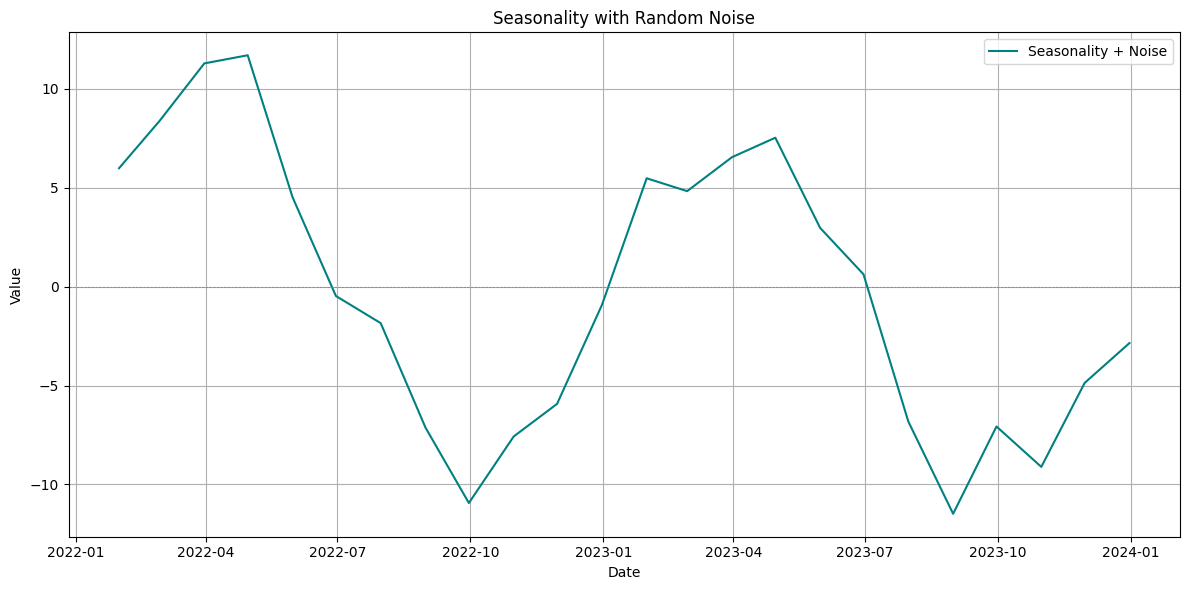

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a date range (e.g., 2 years of monthly data)
date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq='M')

# Simulate seasonal data (e.g., sine wave to mimic seasonality)
seasonality = 10 * np.sin(2 * np.pi * date_range.month / 12)

#np.sin= This generates  a smooth Wave called sine wave.
#Date_range.month : Gives us number from 1 to 12 for each month
#2*np.pi*month/12: This converts months into angles on a circle, so the wave repeats every 12 months showing perfect seasonality
#10*: Multiplying it with 10 to make the waves taller

# Add random noise
np.random.seed(42)  # for reproducibility
noise = np.random.normal(loc=0, scale=2, size=len(date_range)) #This adds random ups and downs on top of the seasonal pattern — like unexpected sales spikes or data errors.
#np.random.normal: Generates random numbers using a bell curve distribution
#loc=0 Centre the noise around 0 (some values will be +ve, some will be -ve)
#scale=2: Spread of noise – higher value = more extreme randomness.
#size=len(date_range): Generate one noise value for each month.

# Combine to form the time series
data = seasonality + noise
#This adds the regular pattern (seasonality) and the random chaos (noise) to get a final, more realistic time series.

# Create DataFrame
df = pd.DataFrame({'Date': date_range, 'Value': data})
df.set_index('Date', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Seasonality + Noise', color='teal')
plt.title('Seasonality with Random Noise')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Stationarity : Consistency Over Time

A Time series whose statiscal properties (Mean, Variance, autocorelation) are constant over time.

## Why it Matters:
Most forecasting models (arima,Sarima, etc assume stationarity) if the series isnt stationary, we need to transform it (E.g. Differencing, Log Transform)

## How to Explain it?

 A stationarity series looks like its bouncing around a stable center. if your series has a clear upward trend or growing seasonal spikes its not stationary.

/tmp/ipython-input-13-789962911.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_index = pd.date_range(start='2020-01-01', periods=100, freq='M')


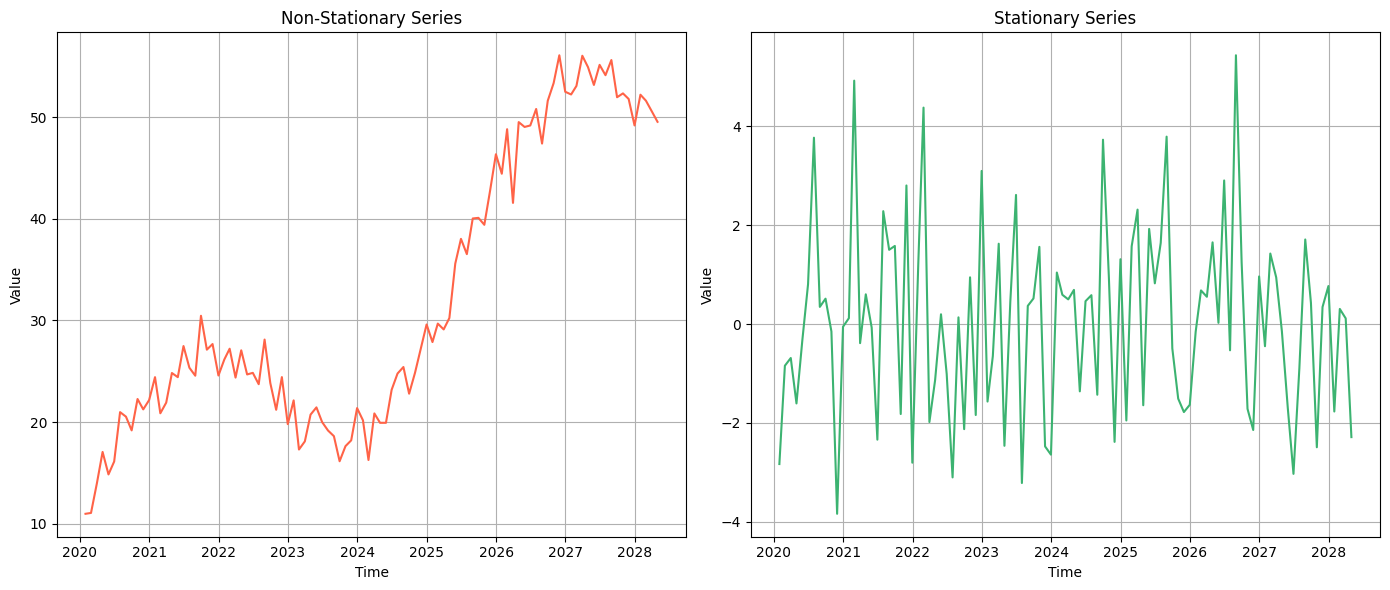

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate time index
time_index = pd.date_range(start='2020-01-01', periods=100, freq='M')

# --------- Non-Stationary Series ----------
# Trend component
trend = np.linspace(10, 50, 100)

# Seasonal component (sinusoidal)
seasonality = 10 * np.sin(np.linspace(0, 3 * np.pi, 100))

# Noise
noise_ns = np.random.normal(0, 2, 100)

# Combine to create non-stationary series
non_stationary = trend + seasonality + noise_ns

# --------- Stationary Series ----------
# Pure random noise (white noise)
stationary = np.random.normal(0, 2, 100)

# --------- Plotting ----------
plt.figure(figsize=(14, 6))

# Plot non-stationary
plt.subplot(1, 2, 1)
plt.plot(time_index, non_stationary, color='tomato')
plt.title('Non-Stationary Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

# Plot stationary
plt.subplot(1, 2, 2)
plt.plot(time_index, stationary, color='mediumseagreen')
plt.title('Stationary Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)

plt.tight_layout()
plt.show()


### Left Plot (Non-Stationary):

"Notice how the series increases over time and the seasonal spikes become more visible. The mean and variance clearly change → this is a non-stationary series."

### Right Plot (Stationary):

"Here the series just fluctuates randomly around zero. The average and spread look consistent throughout the timeline — this is a stationary series."

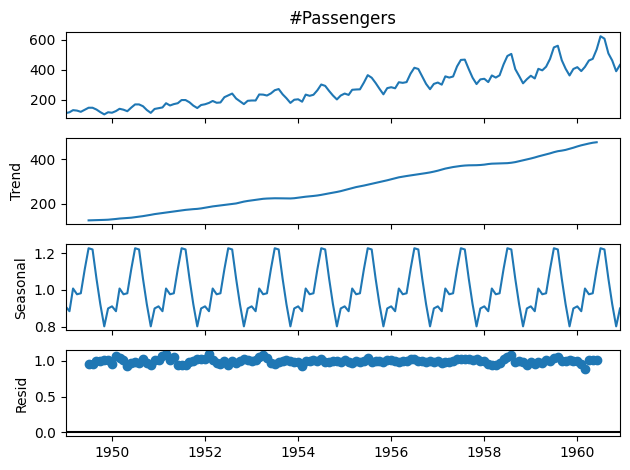

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load data
df = pd.read_csv("AirPassengers.csv")

# Convert 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# Set as index
df.set_index('Month', inplace=True)

# Optional: Sort index if not already
df = df.sort_index()

# Set frequency to monthly ('MS' = Month Start)
df.index.freq = 'MS'

# Now decompose
result = seasonal_decompose(df['#Passengers'], model='multiplicative')

# Plot the result
result.plot()
plt.show()


 ### 1. What does the trend component look like?
### Answer:
The trend line shows a steady upward movement over the years. From 1949 to 1960, passenger counts have been consistently rising. This indicates:

A positive trend, meaning more people traveled by air over time.

Likely due to growth in the airline industry, economy, and accessibility of air travel.

### explanation

“Imagine you’re looking at just the long-term behavior of the data, removing all short-term jumps. This trend tells us that demand for air travel increased year after year.”

### 2. Can you guess the length of the seasonal pattern?
#### Answer:
Yes! You can see the seasonal peaks and dips repeating every 12 data points, which means the seasonality is annual (12 months).

### explanation

“Seasonal patterns repeat at fixed intervals. Since our data is monthly, and the peaks repeat every 12 points, this tells us the seasonality is yearly. Likely due to holiday travel in summer and winter.”

 In this case:

Peaks around mid-year and end-of-year (likely holiday seasons).

Valleys in early parts of the year.

 ### 3. What remains in the residual component?
#### Answer:
The residual (or “resid”) component shows the random noise left after removing trend and seasonality. It includes:

Short-term anomalies or one-off spikes

Sudden deviations not explained by seasonality or trend

External factors like strikes, weather issues, one-time promotions

### explanation

“Residuals are like the leftovers — what’s unexplained by any pattern. If a spike doesn’t fit into the usual seasonal or trend behavior, it shows up here.”

 A good model should have residuals close to zero and randomly scattered, with no obvious pattern — just like your plot shows.

